## Number of possible chords 

Let's see the number of possible chords

**We have 12 possible roots**

In [1]:
possible_notes = list(range(0,12))
possible_notes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We have the following qualities

In [199]:
from pychord_jl.constants import QUALITY_DICT
from pychord_jl.constants import VAL_NOTE_DICT

In [200]:
VAL_NOTE_DICT

{0: ['C', 'B#'],
 1: ['Db', 'C#'],
 2: ['D'],
 3: ['Eb', 'D#'],
 4: ['E', 'Fb'],
 5: ['F', 'E#'],
 6: ['F#', 'Gb'],
 7: ['G'],
 8: ['Ab', 'G#'],
 9: ['A'],
 10: ['Bb', 'A#'],
 11: ['B', 'Cb']}

In [3]:
QUALITY_DICT

OrderedDict([('3', (0, 4)),
             ('5', (0, 7)),
             ('-5', (0, 7)),
             ('sus', (0, 7)),
             ('', (0, 4, 7)),
             ('maj', (0, 4, 7)),
             ('M', (0, 4, 7)),
             ('m', (0, 3, 7)),
             ('min', (0, 3, 7)),
             ('mi', (0, 3, 7)),
             ('dim', (0, 3, 6)),
             ('b5', (0, 3, 6)),
             ('o', (0, 3, 6)),
             ('aug', (0, 4, 8)),
             ('(aug)', (0, 4, 8)),
             ('+5', (0, 4, 8)),
             ('+', (0, 4, 8)),
             ('sus2', (0, 2, 7)),
             ('(sus2)', (0, 2, 7)),
             ('sus4', (0, 5, 7)),
             ('(sus4)', (0, 5, 7)),
             ('s4', (0, 5, 7)),
             ('6', (0, 4, 7, 9)),
             ('add6', (0, 4, 7, 9)),
             ('7', (0, 4, 7, 10)),
             ('(7)', (0, 4, 7, 10)),
             ('(M7)', (0, 4, 7, 10)),
             ('7-5', (0, 4, 6, 10)),
             ('7_5', (0, 4, 6, 10)),
             ('7b5', (0, 4, 6, 10)),
    

In [4]:
len(QUALITY_DICT.keys())

135

In [5]:
unique_qualities = {}
for key,value in QUALITY_DICT.items():
    if value not in unique_qualities.values():
        unique_qualities[key] = value    

In [6]:
len(unique_qualities)

67

In [205]:
unique_qualities.keys()

dict_keys(['3', '5', '', 'm', 'dim', 'aug', 'sus2', 'sus4', '6', '7', '7-5', 'maj7b5', '7+5', '6sus2', '7sus2', '7sus4', 'm6', 'm7', 'AmMaj7', 'm7b5', 'dim6', 'M7', 'M7+5', 'add9', 'madd9', 'add2', 'add4', 'add11', 'sus4(add13)', '6/9', '6add11', 'm6add11', 'add4add9', '9', 'm9', 'M9', '9sus4', '7_6', '7-9', '7+9', '9-5', '9+5', '7#9b5', '7#9#5', '7b9b5', '7b9#5', '11', '7+11', 'm7add11', 'maj11', 'm11', '7b9#9', '7b9#11', '7#9#11', '7-13', 'm7add4', '9+11', 'm9+11', '13', 'maj13', 'madd13', '13sus4', '13-9', '13+9', '13+11', 'm13+11', 'madd11'])

**We have 67 possible qualities**

**We have 12 possible slashes**

In [7]:
67 * 12 * 12

9648

We are not going no consider slashes

In [8]:
67 * 12

804

In [211]:
from jl_chord_parser import ChordParser

parse = ChordParser().parse
possible_chord_vectors = {}
for note in possible_notes:
    for quality in unique_qualities.keys():
        chord_name = f'{VAL_NOTE_DICT[note][0]}{quality}'
        chord = parse(chord_name)
        possible_chord_vectors[chord_name] = chord.note_vector

In [213]:
possible_chord_vectors['C']

[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

## Feature encoding 

Embedding vs One Shot Encoding vs Manual.

A chord can contain notes. There are 12 possible notes. So we are going to encode it as a vector of 12 positions (0 if the note does not exist, 1 if the note does exists)

In [259]:
from music21.stream import Stream
from music21.note import Note
from music21.meter import TimeSignature
from music21.clef import TrebleClef
from music21.text import TextBox
from music21.chord import Chord
from music21.interval import Interval

from jl_chord_parser import ChordParser

import pandas as pd

In [28]:
def clone_chord(chord):
    return Chord(chord.notes)

def to_chord(components):
    return Chord(notes=components, type='whole')

def show_and_listen(chord_str):
    parser = ChordParser()
    extended_chord = parser.parse(chord_str)
    chord = to_chord(extended_chord.components)
    stream = Stream()
    stream.append(chord)
    stream.append(clone_chord(chord)) # Due to a Music21 issue
    print(f'Note vector: {extended_chord.note_vector}')
    print(chord)
    chord.show()
    stream.show('midi')

Note vector: [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
<music21.chord.Chord C E G>


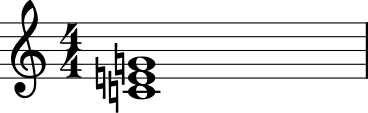

In [29]:
show_and_listen('C')

Note vector: [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
<music21.chord.Chord C G>


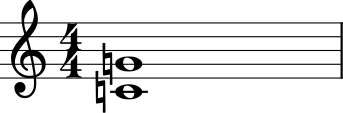

In [30]:
show_and_listen('C5')

Note vector: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
<music21.chord.Chord C E- G->


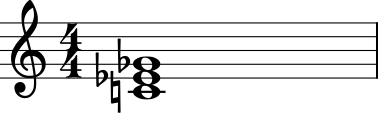

In [31]:
show_and_listen('Co')

Note vector: [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]
<music21.chord.Chord A C E G>


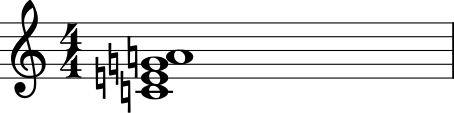

In [32]:
show_and_listen('Am7')

## Prepare data 

In [37]:
from jl_song_data import SongData
from jl_constants import NUMBER_OF_NOTES

In [149]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')
df = data.df

In [151]:
df['chords'] = df['chords'].apply(eval)

In [160]:
from jl_chord_parser import ChordParser
parse = ChordParser().parse

In [152]:
df['chord_vectors'] = df['chords']\
        .apply(lambda chords: [parse(chord) for chord in chords])\
        .apply(lambda chords: [chord.note_vector for chord in chords if chord is not None ] )

In [159]:
df.sample(10)

,url,name,decade,genre,chords,uuid,chord_vectors
8472,https://tabs.ultimate-guitar.com/tab/mercyme/i...,I Can Only Imagine,2000s,Religious Music,"[E, A, D, G, B, E, E, Emaj7, A2, B, E, E, E, E...",066a0e31-42c2-4bcd-9dd1-9a719c9665b8,"[[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], [0, 1, ..."
5051,https://tabs.ultimate-guitar.com/tab/goo-goo-d...,Iris (ver 7),1990s,Rock,"[Em, D, Cadd9, G, Am7, Cadd9, Em, D, Cadd9, G,...",71cd632d-3f13-4a2a-8aee-0786c157c2d7,"[[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [0, 0, ..."
4864,https://tabs.ultimate-guitar.com/tab/george-ha...,If Not For You (ver 2),1970s,Folk%%Folk,"[C, G, D7, G, C, G, A7, D7, D, C, Bm, D7, C, G...",19efa578-8ee2-45bd-9040-63da6d056c5c,"[[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, ..."
11437,https://tabs.ultimate-guitar.com/tab/stevie_wo...,Jungle Fever,1990s,Rhythm And Blues%%Contemporary R&b,"[C, Am, C, F, C, Am, C, G, C, Am, C, F, C, Am,...",495c4a22-e3f0-45ec-89ea-20890c8c91e7,"[[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [1, 0, ..."
9447,https://tabs.ultimate-guitar.com/tab/onerepubl...,Counting Stars (ver 2),2010s,Rock,"[Dm, F, C, Bb, Dm, F, C, Bb, Dm, F, C, Bb, Dm,...",d5455994-150b-41e7-98ed-173bd90d2e4a,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], [1, 0, ..."
10488,https://tabs.ultimate-guitar.com/tab/rihanna/w...,Work,2010s,Contemporary R&b,"[Am7, G/B, Cadd9, D, Am7, G/B, Cadd9, D, Am7, ...",9360bfbd-681a-42b1-a693-a0ecf5b09050,"[[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], [0, 0, ..."
4122,https://tabs.ultimate-guitar.com/tab/eric-clap...,Five Long Years,1970s,Blues,"[A7, D7, A7, A7, D7, D7, A7, A7, E7, D7, A7, D...",e6378e32-786c-43d0-9b07-0e519d89f49b,"[[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], [1, 0, ..."
4273,https://tabs.ultimate-guitar.com/tab/falco/gan...,Ganz Wien,1980s,Electronic%%Electronic,"[Dm7, Em7, Am7, Dm7, Em7, Am7, Dm7, Em7, Am7, ...",23801546-5567-4579-b349-9716b1283b04,"[[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, ..."
4700,https://tabs.ultimate-guitar.com/tab/frank-sin...,Why Try To Change Me Now,1950s,Jazz%%Jazz,"[Fm7, Bb7, Gm7, F#dim7, Fm7, Bb7, Gm7, Caug, F...",4232cd5a-f297-4bd3-b33b-e5311e65a6ab,"[[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, ..."
11337,https://tabs.ultimate-guitar.com/tab/steel_pul...,Man No Sober,1980s,Reggae,"[Em, F#m, Bm, A, Bm, G, Em, A, Bm, G, Em, A, B...",119b8113-3324-4255-8fdd-9abc97a9d603,"[[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [0, 1, ..."


In [153]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

In [155]:
df = df[df['chord_vectors'].apply(lambda chords: len(chords) > 5)]

In [157]:
df.iloc[0]

url              https://tabs.ultimate-guitar.com/tab/10000_man...
name                                                     Dont Talk
decade                                                       1980s
genre                                                         Folk
chords           [D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dm...
uuid                          c639eb23-fefd-4263-af20-3f78f110edcd
chord_vectors    [[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 1, ...
Name: 0, dtype: object

In [176]:
import numpy as np

In [162]:
maxlen = 5
step = 1
sentences = []
next_chords = []

for index, row in df.iterrows():
    sequence = row['chord_vectors']
    for i in range(0, len(sequence) - maxlen, step):
        sentences.append(sequence[i: i + maxlen])
        next_chords.append(sequence[i + maxlen])

In [163]:
len(sentences)

1136924

In [164]:
len(next_chords)

1136924

In [165]:
sentences[0]

[[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

In [166]:
next_chords[0]

[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]

In [177]:
X = np.array(sentences)

In [178]:
Y = np.array(next_chords)

In [310]:
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(5, NUMBER_OF_NOTES)))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(NUMBER_OF_NOTES))
model.add(Activation('softmax'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [311]:
model.fit(X,Y,epochs=1,batch_size=1024,use_multiprocessing=True, verbose=1)

Epoch 1/1
1136924/1136924 [==============================] - 818s 719us/step - loss: 0.1820


In [312]:
def cos_similarity(a,b):
    dot = np.dot(a, b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos = dot / (norma * normb)
    
    return cos

In [317]:
from random import randint

def get_most_similar_chord(predicted):
    greatest_similarity = 0
    most_similar = None
    
    for chord in possible_chord_vectors.keys():
        similarity = cos_similarity(predicted, possible_chord_vectors[chord])
        
        if similarity > greatest_similarity:
            greatest_similarity = similarity
            most_similar = chord
    
    print(f'Most similar: {chord}. Similarity: {greatest_similarity}')
    
    return most_similar

def get_most_similar_chord_2(predicted):
    distance_function = lambda a,b: np.linalg.norm(a-b)
    lowest_distance = 10000000000
    most_similar = None
    
    for chord in possible_chord_vectors.keys():
        distance = distance_function(predicted, possible_chord_vectors[chord])
        
        if distance < lowest_distance:
            lowest_distance = distance
            most_similar = chord
    
    print(f'Most similar: {chord}. Distance: {lowest_distance}')
    
    return most_similar

def get_most_similar_ranking(prediction_chord, distance_function):
    df = pd.DataFrame()
    
    similar_chords = pd.DataFrame(possible_chord_vectors.keys(), columns=['chord'])
    similar_chords['similarity'] = similar_chords['chord'].apply(\
        lambda chord: distance_function(possible_chord_vectors[chord],prediction_chord[0]))
    
    return similar_chords.sort_values(by='similarity')

def get_most_similar_chord(prediction_chord):
    value = randint(0, 10)
    chord = get_most_similar_ranking(prediction_chord,lambda a,b: np.linalg.norm(a-b) ).iloc[0]['chord']
    print(chord)
    return chord
    



In [318]:
def show_sequence(chord_sequence):
    parser = ChordParser()
    stream = Stream()
    
    chord_sequence = [chord_sequence[0], *chord_sequence] # to solve a music21 problem

    for chord_str in chord_sequence:
        extended_chord = parser.parse(chord_str)
        chord = to_chord(extended_chord.components)
        stream.append(chord)

    stream.show()
    stream.show('midi')

In [319]:
ch_str = ['C', 'G', 'C', 'D', 'G']

x = np.zeros((1, 5, 12))
for t, char in enumerate(ch_str):
    x[0, t] = parse(char).note_vector
    
prediction = model.predict(np.array(np.array([ch])))
prediction
most_similar = get_most_similar_chord(prediction)
most_similar
prediction

C5


array([[2.1550009e-01, 1.4278668e-05, 1.8000765e-01, 1.9611543e-02,
        7.2630234e-03, 2.0457883e-03, 2.8408575e-05, 5.4264426e-01,
        1.5025442e-04, 2.3242581e-04, 2.1890411e-02, 1.0611858e-02]],
      dtype=float32)

['C', 'G', 'C', 'D', 'G']
['C', 'G', 'C', 'D', 'G']
C5
['G', 'C', 'D', 'G', 'C5']
['G', 'C', 'D', 'G', 'C5']
D3
['C', 'D', 'G', 'C5', 'D3']
['C', 'D', 'G', 'C5', 'D3']
G3
['D', 'G', 'C5', 'D3', 'G3']
['D', 'G', 'C5', 'D3', 'G3']
C5
['G', 'C5', 'D3', 'G3', 'C5']
['G', 'C5', 'D3', 'G3', 'C5']
G5
['C5', 'D3', 'G3', 'C5', 'G5']
['C5', 'D3', 'G3', 'C5', 'G5']
C5
['D3', 'G3', 'C5', 'G5', 'C5']
['D3', 'G3', 'C5', 'G5', 'C5']
G5
['G3', 'C5', 'G5', 'C5', 'G5']
['G3', 'C5', 'G5', 'C5', 'G5']
C5
['C5', 'G5', 'C5', 'G5', 'C5']
['C5', 'G5', 'C5', 'G5', 'C5']
G5
['G5', 'C5', 'G5', 'C5', 'G5']
['G5', 'C5', 'G5', 'C5', 'G5']
C5
['C5', 'G5', 'C5', 'G5', 'C5']
['C5', 'G5', 'C5', 'G5', 'C5']
G5
['G5', 'C5', 'G5', 'C5', 'G5']
['G5', 'C5', 'G5', 'C5', 'G5']
C5
['C5', 'G5', 'C5', 'G5', 'C5']
['C5', 'G5', 'C5', 'G5', 'C5']
G5
['G5', 'C5', 'G5', 'C5', 'G5']
['G5', 'C5', 'G5', 'C5', 'G5']
C5
['C5', 'G5', 'C5', 'G5', 'C5']
['C5', 'G5', 'C5', 'G5', 'C5']
G5
['G5', 'C5', 'G5', 'C5', 'G5']
['G5', 'C5', 'G5', 'C5',

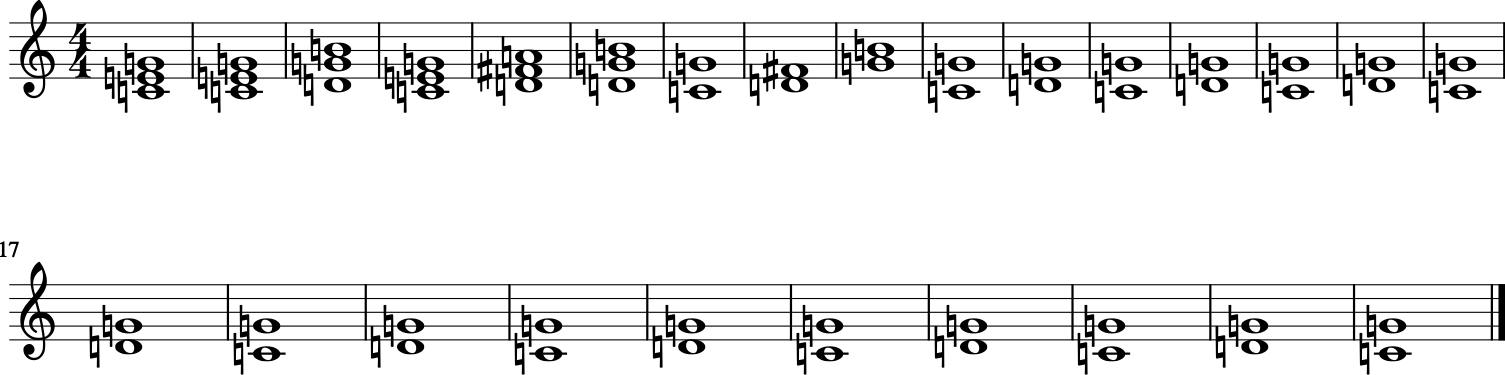

In [320]:
ch_str = ['C', 'G', 'C', 'D', 'G']

for i in range(0,20):
    last_five = ch_str[-5:]
    print(last_five)
    ch = [parse(chord).note_vector for chord in last_five]
    print(last_five)
    prediction = model.predict(np.array(np.array([ch])))
    most_similar = get_most_similar_chord(prediction)
    ch_str.append(most_similar)

show_sequence(ch_str)